In [4]:
import math
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# One-dimensional methods

In [104]:
def exhaustive_search(f, a, b, epsilon=0.001):
    
    n = int((b - a) / epsilon) + 1
    min_x = a
    min_f = f(a)
    f_calculations = 1
    iterations = 0
    
    for i in range(n + 1):
        iterations += 1
        x = a + i * (b - a) / n
        fx = f(x)
        f_calculations += 1
        if fx < min_f:
            min_f = fx
            min_x = x
        
    return [min_x, min_f, f_calculations, iterations]

def dichotomy_search(f, a, b, epsilon=0.001):

    delta = epsilon / 3 
    f_calculations = 0
    iterations = 0
    
    while (b - a) > epsilon:
        iterations += 1
        mid = (a + b) / 2
        x1 = mid - delta
        x2 = mid + delta
        
        f1 = f(x1)
        f2 = f(x2)
        f_calculations += 2
        
        if f1 < f2:
            b = x2
        else:
            a = x1
    min_x = (a + b) / 2
    min_f = f(min_x)
    f_calculations += 1
    
    return [min_x, min_f, f_calculations, iterations]

def golden_section_search(f, a, b, epsilon=0.001):
   
    phi = (1 + math.sqrt(5)) / 2
    
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    
    f1 = f(x1)
    f2 = f(x2)
    f_calculations = 2  
    iterations = 0
    
    while (b - a) > epsilon:
        iterations += 1
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - (b - a) / phi
            f1 = f(x1)
            f_calculations += 1
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b - a) / phi
            f2 = f(x2)
            f_calculations += 1
    min_x = (a + b) / 2
    min_f = f(min_x)
    f_calculations += 1
    
    return [min_x, min_f, f_calculations, iterations]

### The function f(x)=x^3 with the approximation methods

In [13]:
def f_1(x):
    return x**3

a,b = 0.0,1.0
result_1_es = exhaustive_search(f_1, a, b, epsilon=0.001)
print(f"x = {result_1_es[0]}, f(x) = {result_1_es[1]}, f_calculations = {result_1_es[2]}, iterations = {result_1_es[3]}")
result_1_ds = dichotomy_search(f_1, a, b, epsilon=0.001)
print(f"x = {result_1_ds[0]}, f(x) = {result_1_ds[1]}, f_calculations = {result_1_ds[2]}, iterations = {result_1_ds[3]}")
result_1_gss = golden_section_search(f_1, a, b, epsilon=0.001)
print(f"x = {result_1_gss[0]}, f(x) = {result_1_gss[1]}, f_calculations = {result_1_gss[2]}, iterations = {result_1_gss[3]}")


x = 0.0, f(x) = 0.0, f_calculations = 1003, iterations = 1002
x = 0.00045532226562499994, f(x) = 9.43966679187724e-11, f_calculations = 25, iterations = 12
x = 0.00036656871792870244, f(x) = 4.925680085772847e-11, f_calculations = 18, iterations = 15


### The function f(x)=|x-0.2| with the approximation methods

In [15]:
def f_2(x):
    return abs(x-0.2)
    
a,b = 0.0,1.0
result_2_es = exhaustive_search(f_2, a, b, epsilon=0.001)
print(f"x = {result_2_es[0]}, f(x) = {result_2_es[1]}, f_calculations = {result_2_es[2]}, iterations = {result_2_es[3]}")
result_2_ds = dichotomy_search(f_2, a, b, epsilon=0.001)
print(f"x = {result_2_ds[0]}, f(x) = {result_2_ds[1]}, f_calculations = {result_2_ds[2]}, iterations = {result_2_ds[3]}")
result_2_gss = golden_section_search(f_2, a, b, epsilon=0.001)
print(f"x = {result_2_gss[0]}, f(x) = {result_2_gss[1]}, f_calculations = {result_2_gss[2]}, iterations = {result_2_gss[3]}")


x = 0.1998001998001998, f(x) = 0.00019980019980020414, f_calculations = 1003, iterations = 1002
x = 0.2000292154947917, f(x) = 2.9215494791678953e-05, f_calculations = 25, iterations = 12
x = 0.20007331374358575, f(x) = 7.331374358574005e-05, f_calculations = 18, iterations = 15


### The function f(x)=x*sin(1/x) with the approximation methods

In [17]:
def f_3(x):
    if x==0:
        return 0
    return x*math.sin(1/x)

a,b = 0.01,1.0
result_3_es = exhaustive_search(f_3, a, b, epsilon=0.001)
print(f"x = {result_3_es[0]}, f(x) = {result_3_es[1]}, f_calculations = {result_3_es[2]}, iterations = {result_3_es[3]}")
result_3_ds = dichotomy_search(f_3, a, b, epsilon=0.001)
print(f"x = {result_3_ds[0]}, f(x) = {result_3_ds[1]}, f_calculations = {result_3_ds[2]}, iterations = {result_3_ds[3]}")
result_3_gss = golden_section_search(f_3, a, b, epsilon=0.001)
print(f"x = {result_3_gss[0]}, f(x) = {result_3_gss[1]}, f_calculations = {result_3_gss[2]}, iterations = {result_3_gss[3]}")

x = 0.22278506559031283, f(x) = -0.21723114656143902, f_calculations = 993, iterations = 992
x = 0.2225231119791667, f(x) = -0.21723360042950127, f_calculations = 25, iterations = 12
x = 0.22271959361960325, f(x) = -0.21723232817753246, f_calculations = 18, iterations = 15


### Results
* It can be seen here that for exhaustive search method, the number of f-calculations is commensurate with the number of iterations, and it is many times higher in comparison with the other two methods.
* Dichotomy search method is characterized by the f-calculations twice as many as the number of iterations.
* For golden section search method f-calculations and number of iterations are commensurate. And despite the fact that the number of iterations is slightly more than in dichotomy search, relative to the number of f-calculations, the golden section search is more efficient.

# Two-dimensional methods

Generating the original data an adding noize to it

In [6]:
np.random.seed(123)
alpha = np.random.rand()
beta = np.random.rand()
x_k = np.arange(101)/100
delta_k = np.random.randn(101)
y_correct = alpha*x_k + beta
y_k = y_correct + delta_k

In [8]:
print(f"alpha = {alpha}, beta = {beta}")

alpha = 0.6964691855978616, beta = 0.28613933495037946


### Creating the target function for linear approximant and rational approximant

In [10]:
def target_func_linear(params, x_data, y_data):
    a,b = params
    F_x = a * x_data + b
    residuals = F_x - y_data
    return np.sum(residuals**2)

def target_func_rational(params, x_data, y_data):
    a, b = params
    denominator = 1 + b * x_data
    if np.any(np.abs(denominator) < 1e-10):
        return 1e10
    F_x = a / denominator
    residuals = F_x - y_data
    return np.sum(residuals**2)

### Exhaustive search Linear

 a_best= 0.6740000000000015, b_best = 0.3190000000000013, min_value = 129.97328034791084, f-calculations = 9006001, iterations = 9006001


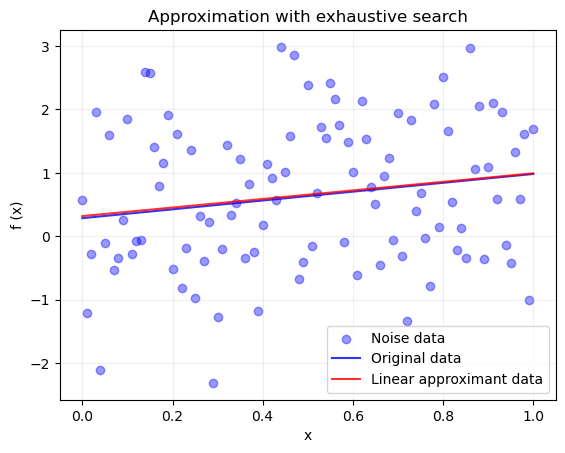

In [12]:
def exhaustive_search_multi(target_func, x_data, y_data, a_range, b_range, step=0.001):
    
    a_min, a_max = a_range
    b_min, b_max = b_range
    
    a_values = np.arange(a_min, a_max + step, step)
    b_values = np.arange(b_min, b_max + step, step)

    min_value = np.inf
    a_best = 0
    b_best = 0
    f_calculations = 0
    iterations = 0

    for a in a_values:
        for b in b_values:
            iterations += 1
            f_calculations += 1
            current_value = target_func([a, b], x_data, y_data)

            if current_value < min_value:
                min_value = current_value
                a_best = a
                b_best = b

    return [a_best, b_best, min_value, f_calculations, iterations]

a_range_linear = (-1, 2)
b_range_linear = (-1, 2)
result_linear_es = exhaustive_search_multi(target_func_linear, x_k, y_k, a_range_linear, b_range_linear, step=0.001)
print(f" a_best= {result_linear_es[0]}, b_best = {result_linear_es[1]}, min_value = {result_linear_es[2]}, f-calculations = {result_linear_es[3]}, iterations = {result_linear_es[4]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_es = result_linear_es[0]*x_k + result_linear_es[1]
plt.plot(x_k, y_es, 'r-', alpha=0.8, label='Linear approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with exhaustive search')
plt.legend()
plt.show()

### Exhaustive search Rational

 a_best= 0.4640000000000013, b_best = -0.5299999999999997, min_value = 130.9195611753871, f-calculations = 8705901, iterations = 8705901


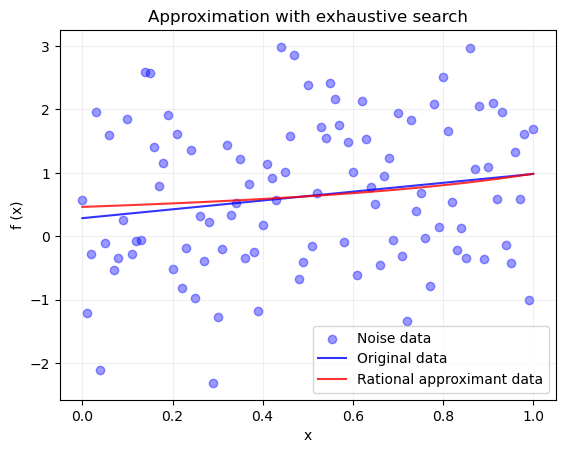

In [14]:
a_range_rational = (-1, 2)
b_range_rational = (-0.9, 2)
result_rational_es = exhaustive_search_multi(target_func_rational, x_k, y_k, a_range_rational, b_range_rational, step=0.001)
print(f" a_best= {result_rational_es[0]}, b_best = {result_rational_es[1]}, min_value = {result_rational_es[2]}, f-calculations = {result_rational_es[3]}, iterations = {result_rational_es[4]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_r_es = result_rational_es[0]/(1 + result_rational_es[1]*x_k)
plt.plot(x_k, y_r_es, 'r-', alpha=0.8, label='Rational approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with exhaustive search')
plt.legend()
plt.show()

### Gauss method Linear

 a_best= 0.6846707474153076, b_best = 0.3135793957705489, min_value = 129.974243631208, f-calculations = 1279, iterations = 14


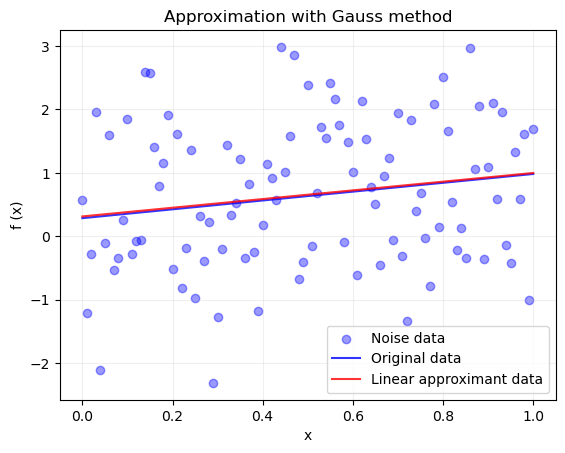

In [20]:
def gauss_coordinate_descent(f, x0, epsilon=0.001 ):

    max_iter=1000
    x_current = np.array(x0, dtype=float)
    f_current = f(x_current)
    
    iterations = 0
    f_calculations = 0
    trajectory = [x_current.copy()]
    f_values = [f_current]
    
    for iteration in range(max_iter):
        x_prev = x_current.copy()
        f_prev = f_current
        
        # x1 minimization
        def f_x1(x1_val):
            return f([x1_val, x_current[1]])

        result_x1 = scipy.optimize.minimize_scalar(f_x1, method='golden')
        x_current[0] = result_x1.x
        f_calculations += result_x1.nfev
        
        # x2 minimization
        def f_x2(x2_val):
            return f([x_current[0], x2_val])
        
        result_x2 = scipy.optimize.minimize_scalar(f_x2, method='golden')
        x_current[1] = result_x2.x
        f_calculations += result_x2.nfev
        
        f_current = f(x_current)
        f_calculations += 1
        
        iterations += 1
        trajectory.append(x_current.copy())
        f_values.append(f_current)

        dx = np.linalg.norm(x_current - x_prev)
        df = abs(f_current - f_prev)
        
        if dx <= epsilon or df <= epsilon:
            break

    return {
        'x_opt': x_current,
        'f_opt': f_current,
        'iterations': iterations,
        'f_calculations': f_calculations
    }

result_linear_gcd = gauss_coordinate_descent(f=lambda params: target_func_linear(params, x_k, y_k), x0=[0,0], epsilon=0.001)
print(f" a_best= {result_linear_gcd['x_opt'][0]}, b_best = {result_linear_gcd['x_opt'][1]}, min_value = {result_linear_gcd['f_opt']}, f-calculations = {result_linear_gcd['f_calculations']}, iterations = {result_linear_gcd['iterations']}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_l_gcd = result_linear_gcd['x_opt'][0]*x_k + result_linear_gcd['x_opt'][1]
plt.plot(x_k, y_l_gcd, 'r-', alpha=0.8, label='Linear approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Gauss method')
plt.legend()
plt.show()

### Gauss method Rational

 a_best= 0.46662113049502363, b_best = -0.5264221351041186, min_value = 130.920037877868, f-calculations = 1094, iterations = 12


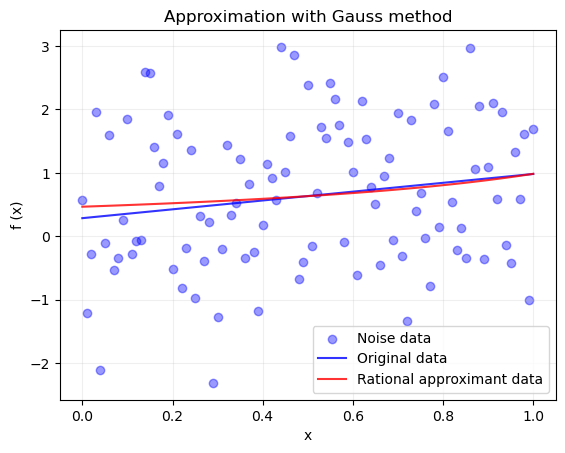

In [23]:
result_rational_gcd = gauss_coordinate_descent(f=lambda params: target_func_rational(params, x_k, y_k), x0=[0,0], epsilon=0.001)
print(f" a_best= {result_rational_gcd['x_opt'][0]}, b_best = {result_rational_gcd['x_opt'][1]}, min_value = {result_rational_gcd['f_opt']}, f-calculations = {result_rational_gcd['f_calculations']}, iterations = {result_rational_gcd['iterations']}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_r_gcd = result_rational_gcd['x_opt'][0]/(1 + result_rational_gcd['x_opt'][1]*x_k)
plt.plot(x_k, y_r_gcd, 'r-', alpha=0.8, label='Rational approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Gauss method')
plt.legend()
plt.show()

### Nelder-Mead method Linear

 a_best= 0.6740420636384133, b_best = 0.3188928241636555, min_value = 129.9732795760384, f-calculations = 138, iterations = 71


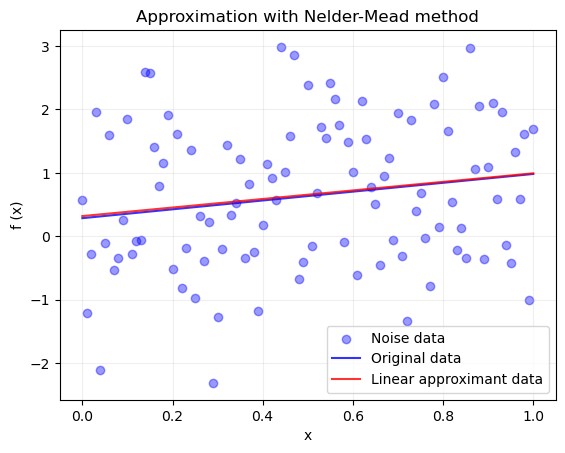

In [25]:
def nelder_mead(target_func, x0, x_data, y_data):

    result = scipy.optimize.minimize(target_func, x0, args=(x_data, y_data),
                     method='Nelder-Mead',
                     options={'disp': False, 'return_all': True})
    
    return {
        'x_opt': result.x,
        'f_opt': result.fun,
        'f_calculations': result.nfev,
        'iterations': result.nit
    }

result_linear_nm = nelder_mead(target_func_linear, [0,0], x_k, y_k)
print(f" a_best= {result_linear_nm['x_opt'][0]}, b_best = {result_linear_nm['x_opt'][1]}, min_value = {result_linear_nm['f_opt']}, f-calculations = {result_linear_nm['f_calculations']}, iterations = {result_linear_nm['iterations']}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_l_nm = result_linear_nm['x_opt'][0]*x_k + result_linear_nm['x_opt'][1]
plt.plot(x_k, y_l_nm, 'r-', alpha=0.8, label='Linear approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Nelder-Mead method')
plt.legend()
plt.show()

### Nelder-Mead Rational 

 a_best= 0.4639414620337565, b_best = -0.5301362819814402, min_value = 130.91956061231585, f-calculations = 102, iterations = 53


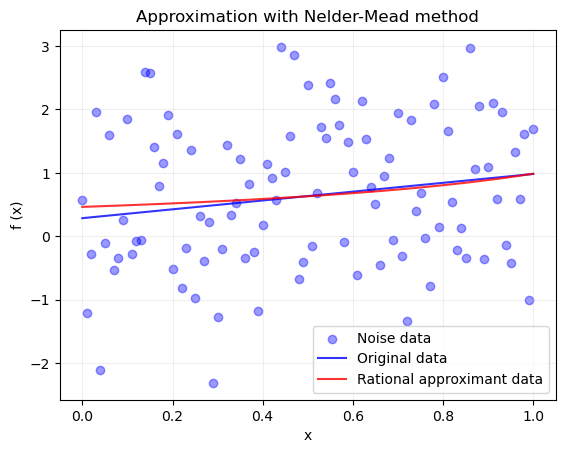

In [27]:
result_rational_nm = nelder_mead(target_func_rational, [0,0], x_k, y_k)
print(f" a_best= {result_rational_nm['x_opt'][0]}, b_best = {result_rational_nm['x_opt'][1]}, min_value = {result_rational_nm['f_opt']}, f-calculations = {result_rational_nm['f_calculations']}, iterations = {result_rational_nm['iterations']}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_r_nm = result_rational_nm['x_opt'][0]/(1 + result_rational_nm['x_opt'][1]*x_k)
plt.plot(x_k, y_r_nm, 'r-', alpha=0.8, label='Rational approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Nelder-Mead method')
plt.legend()
plt.show()

### Results
* Based on the experiments performed, it can be seen that for linear approximation, the calculated coefficients a and b are close to the specified alpha and beta values.
* When approached rationally, they differ from the point of view of the graph, it represents a smooth curved line, which is logical, since the shape of the function is different.  With a rational approximation, the parameters a and b are chosen in order to maximize the initial linear dependence.
* If we compare the results obtained using the three optimization methods, they have fairly correctly calculated parameters a and b.
* For the Gauss method, the number of iterations is minimal, but the number of f-calculations is about 90 times more.
* The Nelder-Mead method has more iterations and twice as many f-calculations.
* In comparison with rational approximation, the quantitative ratios are about the same, the least effective method is the exhaustive search method.